<a href="https://colab.research.google.com/github/ChetanKrishna07/Speech-Emotion-Recognition/blob/main/Speech_Emotion_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import os
import librosa

# Load audio files and extract features
def extract_features(file_path):
    with open(file_path, 'rb') as f:
        audio, sr = librosa.load(f)
        mfccs = librosa.feature.mfcc(audio, sr=sr, n_mfcc=20)
        delta = librosa.feature.delta(mfccs)
        delta_delta = librosa.feature.delta(mfccs, order=2)
        features = np.vstack([mfccs, delta, delta_delta])
    return features.T

pip install pydub


train = tfds.load('crema_d', split="train")

train_df = pd.DataFrame(train)

audio_paths = train_df['audio'].apply(lambda x: x['file']).tolist()
labels = train_df['emotion'].tolist()
X = []
y = []
for i, path in enumerate(audio_paths):
    emotion = labels[i]
    label = train_df['label'][i].numpy()
    features = extract_features(path)
    X.append(features)
    y.append(label)

train_df['audio']

train_df.head()


train_df.audio

label_numpy = train_df['label'][4].numpy()
label_numpy

train_df.audio[0]

audio_paths = train_df['audio'].apply(lambda x: x).tolist()
X = []
y = []
for i, path in enumerate(audio_paths):
    #print(path.numpy())
    label = train_df['label'][i].numpy()
    features = extract_features(path.numpy())
    X.append(features)
    y.append(label)

audio_paths = train_df['audio'].apply(lambda x: x['file']).tolist()
X = []
y = []
for i, path in enumerate(audio_paths):
    label = train_df['label'][i].numpy()
    features = extract_features(path.numpy().decode('utf-8'))
    X.append(features)
    y.append(label)


audio_paths[0].numpy()

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
pathMain = "/content/drive/MyDrive/datasets/cremad/AudioWAV/"
dir_list = os.listdir(pathMain)
dir_list.sort()
print(dir_list[0:10])

['1001_DFA_ANG_XX.wav', '1001_DFA_DIS_XX.wav', '1001_DFA_FEA_XX.wav', '1001_DFA_HAP_XX.wav', '1001_DFA_NEU_XX.wav', '1001_DFA_SAD_XX.wav', '1001_IEO_ANG_HI.wav', '1001_IEO_ANG_LO.wav', '1001_IEO_ANG_MD.wav', '1001_IEO_DIS_HI.wav']


In [5]:
gender = []
emotion = []
path = []
female = [1002,1003,1004,1006,1007,1008,1009,1010,1012,1013,1018,1020,1021,1024,1025,1028,1029,1030,1037,1043,1046,1047,1049,
          1052,1053,1054,1055,1056,1058,1060,1061,1063,1072,1073,1074,1075,1076,1078,1079,1082,1084,1089,1091]

for i in dir_list: 
    part = i.split('_')
    if int(part[0]) in female:
        temp = 'female'
    else:
        temp = 'male'
    gender.append(temp)
    if part[2] == 'SAD' and temp == 'male':
        emotion.append('male_sad')
    elif part[2] == 'ANG' and temp == 'male':
        emotion.append('male_angry')
    elif part[2] == 'DIS' and temp == 'male':
        emotion.append('male_disgust')
    elif part[2] == 'FEA' and temp == 'male':
        emotion.append('male_fear')
    elif part[2] == 'HAP' and temp == 'male':
        emotion.append('male_happy')
    elif part[2] == 'NEU' and temp == 'male':
        emotion.append('male_neutral')
    elif part[2] == 'SAD' and temp == 'female':
        emotion.append('female_sad')
    elif part[2] == 'ANG' and temp == 'female':
        emotion.append('female_angry')
    elif part[2] == 'DIS' and temp == 'female':
        emotion.append('female_disgust')
    elif part[2] == 'FEA' and temp == 'female':
        emotion.append('female_fear')
    elif part[2] == 'HAP' and temp == 'female':
        emotion.append('female_happy')
    elif part[2] == 'NEU' and temp == 'female':
        emotion.append('female_neutral')
    else:
        emotion.append('Unknown')
    path.append(pathMain + i)

df = pd.DataFrame(emotion, columns=['labels'])
df['source'] = 'CREMA-D'
df = pd.concat([df, pd.DataFrame(path, columns=['path'])], axis=1)
df.head()


,labels,source,path
0,male_angry,CREMA-D,/content/drive/MyDrive/datasets/cremad/AudioWA...
1,male_disgust,CREMA-D,/content/drive/MyDrive/datasets/cremad/AudioWA...
2,male_fear,CREMA-D,/content/drive/MyDrive/datasets/cremad/AudioWA...
3,male_happy,CREMA-D,/content/drive/MyDrive/datasets/cremad/AudioWA...
4,male_neutral,CREMA-D,/content/drive/MyDrive/datasets/cremad/AudioWA...


In [6]:
df['labels'].value_counts()

male_angry        671
male_disgust      671
male_fear         671
male_happy        671
male_sad          671
female_angry      600
female_disgust    600
female_fear       600
female_happy      600
female_sad        600
male_neutral      575
female_neutral    512
Name: labels, dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7442 entries, 0 to 7441
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   labels  7442 non-null   object
 1   source  7442 non-null   object
 2   path    7442 non-null   object
dtypes: object(3)
memory usage: 174.5+ KB


In [8]:
def plot_random():
  f = plt.figure()
  f.set_figwidth(8)
  f.set_figheight(16)
  idx = np.random.randint(0, len(df))
  data, sr = librosa.load(df['path'][idx], sr=44100)
  emotion = df['labels'][idx]
  plt.subplot(4, 1, 1)
  plt.title(f'Sound wave of- {emotion}')
  librosa.display.waveshow(data, sr=sr)
  plt.subplot(4, 1, 2)
  plt.title('Time v/s Frequency')
  D = np.abs(librosa.stft(data))
  librosa.display.specshow(D, sr=sr, x_axis='time', y_axis='linear');
  plt.colorbar()
  plt.subplot(4, 1, 3)
  plt.title('log-scaled')
  DB = librosa.amplitude_to_db(D, ref=np.max)
  librosa.display.specshow(DB, sr=sr, x_axis='time', y_axis='log');
  plt.colorbar(format='%+2.0f db')
  plt.subplot(4, 1, 4)
  plt.magnitude_spectrum(data, scale='dB')
  plt.show()

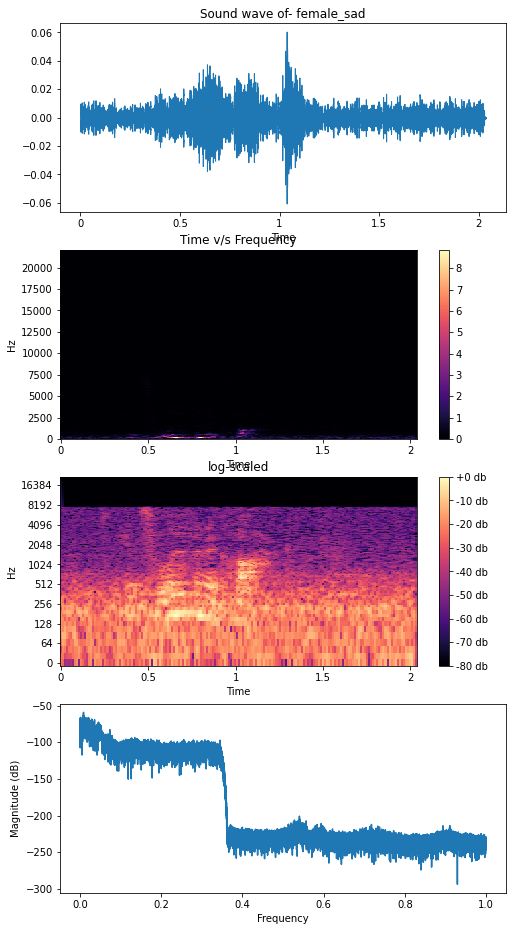

In [9]:
plot_random()

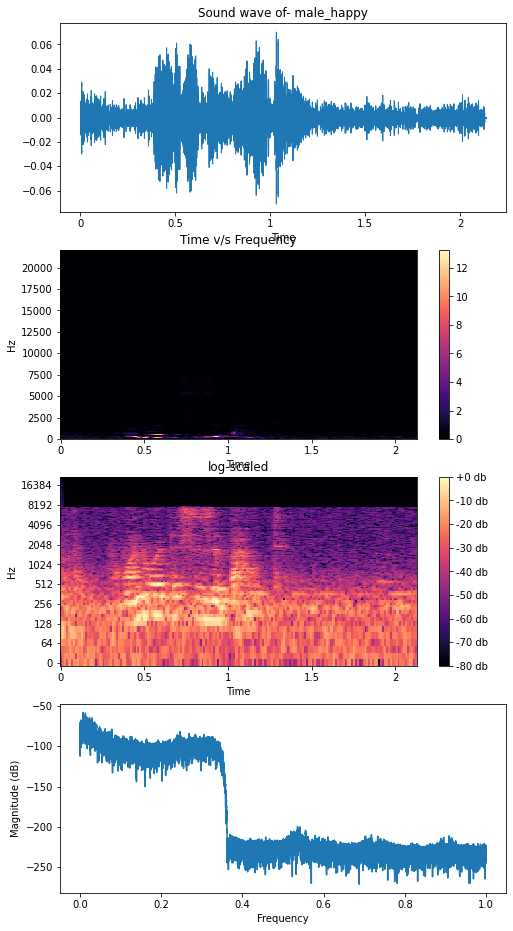

In [10]:
plot_random()

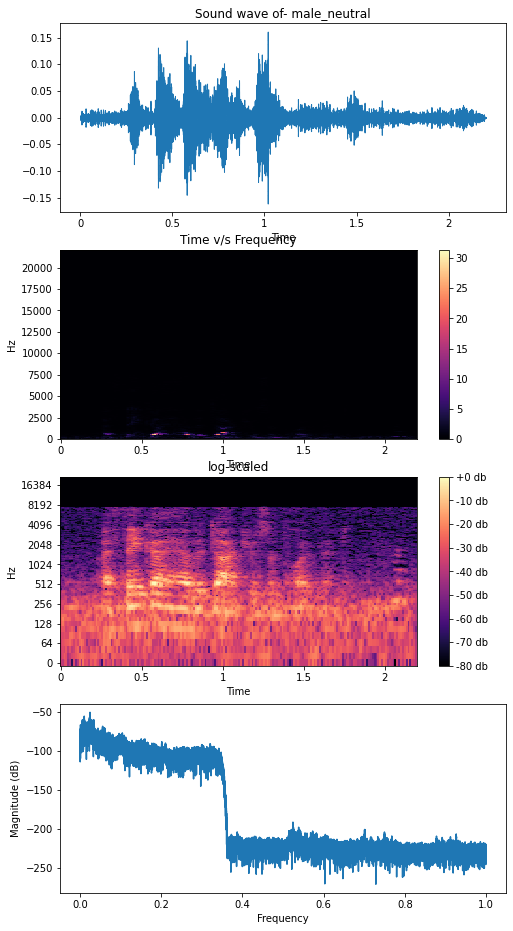

In [11]:
plot_random()

In [12]:
df.head()

,labels,source,path
0,male_angry,CREMA-D,/content/drive/MyDrive/datasets/cremad/AudioWA...
1,male_disgust,CREMA-D,/content/drive/MyDrive/datasets/cremad/AudioWA...
2,male_fear,CREMA-D,/content/drive/MyDrive/datasets/cremad/AudioWA...
3,male_happy,CREMA-D,/content/drive/MyDrive/datasets/cremad/AudioWA...
4,male_neutral,CREMA-D,/content/drive/MyDrive/datasets/cremad/AudioWA...


In [13]:
df.shape

(7442, 3)

from tqdm import tqdm
X = []
y = []
mfccs = []
for i in tqdm(range(df.shape[0])):
  audio, sr = librosa.load(df.path[i], sr=44000)
  X.append(audio)
  y.append(df.labels[i])
  mfcc = librosa.feature.mfcc(y = audio, sr=44000, n_mfcc=20)
  mfcc = mfcc.T
  mfccs.append(mfcc)

features_df = pd.DataFrame({"X": X, "y": y, "mfccs": mfccs})

In [14]:
def feature_extract(i):
  audio, sr = librosa.load(df.path[i], sr=44000)
  y = df.labels[i]
  mfcc = librosa.feature.mfcc(y = audio, sr=44000, n_mfcc=20)
  mfcc = mfcc.T
  return audio, y, mfcc

In [15]:
from multiprocessing import Pool
from tqdm import tqdm
with Pool() as p:
  results = list(tqdm(p.imap(feature_extract, range(df.shape[0])), total=df.shape[0]))

X, y, mfccs = zip(*results)

100%|██████████| 7442/7442 [04:13<00:00, 29.30it/s]


In [17]:
features_df = pd.DataFrame({"X": X, "y": y, "mfccs": mfccs})
features_df.head()

,X,y,mfccs
0,"[8.038027e-10, 9.743018e-10, 5.8584193e-10, 3....",male_angry,"[[-621.88904, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0...."
1,"[0.0008335107, 0.0011384938, 0.0012383913, 0.0...",male_disgust,"[[-553.42816, 135.96695, 15.907367, 33.460663,..."
2,"[0.0075395484, 0.009629045, 0.008977726, 0.008...",male_fear,"[[-473.6652, 105.60277, 38.04201, 21.428577, 1..."
3,"[-0.0039882497, -0.0047220113, -0.0038890885, ...",male_happy,"[[-494.91086, 98.16116, 27.472227, 43.586044, ..."
4,"[0.0022234684, 0.0025174157, 0.0018540383, 0.0...",male_neutral,"[[-513.1206, 110.100525, 48.20282, 25.987495, ..."


In [19]:
features_df.to_pickle("/content/drive/MyDrive/datasets/cremad/CREMA_D_MFCCS.pkl")

In [20]:
features_read = pd.read_pickle("CREMA_D_MFCCS.pkl")

In [21]:
features_read.head()

,X,y,mfccs
0,"[8.038027e-10, 9.743018e-10, 5.8584193e-10, 3....",male_angry,"[[-621.88904, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0...."
1,"[0.0008335107, 0.0011384938, 0.0012383913, 0.0...",male_disgust,"[[-553.42816, 135.96695, 15.907367, 33.460663,..."
2,"[0.0075395484, 0.009629045, 0.008977726, 0.008...",male_fear,"[[-473.6652, 105.60277, 38.04201, 21.428577, 1..."
3,"[-0.0039882497, -0.0047220113, -0.0038890885, ...",male_happy,"[[-494.91086, 98.16116, 27.472227, 43.586044, ..."
4,"[0.0022234684, 0.0025174157, 0.0018540383, 0.0...",male_neutral,"[[-513.1206, 110.100525, 48.20282, 25.987495, ..."


In [22]:
def plot_random_mfccs():
  idx = np.random.randint(0, len(features_read))
  librosa.display.specshow(features_read.mfccs[idx], x_axis='time')
  plt.title(f'MFCCs of {features_read.y[idx]}')
  plt.colorbar()
  plt.tight_layout()
  plt.show()

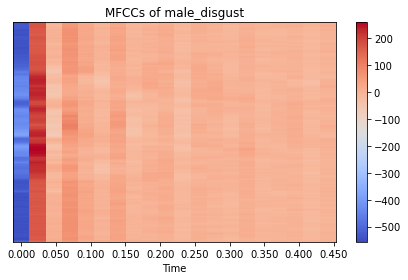

In [23]:
plot_random_mfccs()

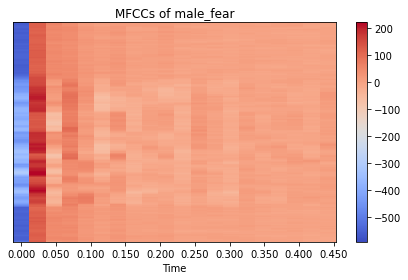

In [24]:
plot_random_mfccs()

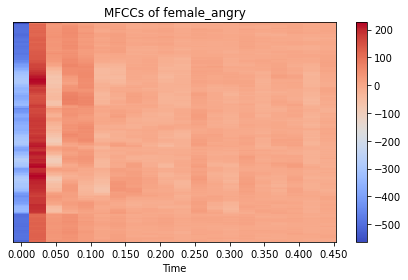

In [25]:
plot_random_mfccs()